#Arman Atarodi  - Neural Network - Home Work 01 - Question 2 -AdaLine & MadaLine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [24]:
#Define a class with the charectristics of adaline neuron
class adaline_neuron:

    # one can change these constants
    def __init__(self):
        self.w = [0.002 ,0.00319 ]
        self.alpha = 0.0001
        self.threshold = 0.005
        self.net = -1
        self.h = 0

    def setInput(self , x0 , x1):
        input = np.array([[x0],
                    [x1]])
        self.net = np.sum(np.matmul(self.w , input)) + self.threshold

    def getH(self):
        if self.net != -1 :
            if self.net >= self.CONST_THRESHOLD : self.h = 1
            else : self.h = 0
        return self.h

    def getNet(self):
        return self.net

    def getW(self):
        return self.w

    def getThreshold(self):
        return self.threshold

    def learn(self , sx , sy ,t ):
        i=0
        #start using the formula to find the right weights and biyas
        temp =0
        for i in range(200):
            self.setInput(sx[i] , sy[i])
            self.w[0] = self.w[0] + (self.alpha *
                                     (t[i] - self.net) * sx[i] )
            self.w[1] = self.w[1] + (self.alpha *
                                     (t[i] - self.net) * sy[i] )
            #find the right biyas
            self.threshold = self.threshold + (self.alpha * (t[i] - self.net))
            temp+= (1/2 *((t[i] - self.net)**2))
        return temp/200

    def isEnough(self , sx , sy , t ):
        CONST_ERROR_THRESHOLD = 1
        flag = False
        for i in range (100):
            self.setInput(sx[i] , sy[i])
           # print((t - self.net)**2)
            if ((t - self.net) **2) > CONST_ERROR_THRESHOLD : 
                flag = True
        return flag


In [18]:
#creating the firt sets of data
mean1 = [0, 0]
cov1 = [[0.1 , 0], [0, 0.4]]
x1 , y1 = np.random.multivariate_normal(mean1, cov1 , 100).T
#---
#Creating the secong sets of data
mean2 = [1, 1]
cov2 = [[0.2 , 0], [0, 0.2]]
x2  , y2= np.random.multivariate_normal(mean2, cov2 , 100).T

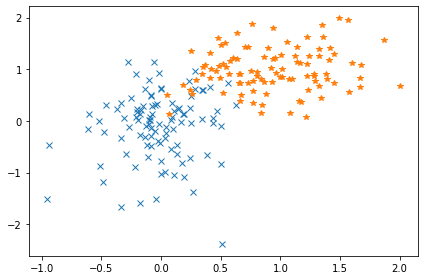

In [19]:
plt.plot(x1 , y1,  'x')
plt.plot(x2 , y2,  '*')

In [20]:
category = np.concatenate([np.ones(shape=(100 , 1) , dtype=int) , -1*np.ones(shape=(100 , 1) , dtype=int)])
all_data =np.concatenate( [np.stack((x1,y1) , axis = -1) , np.stack((x2,y2) , axis = -1)] , axis=0)
all_data = np.concatenate([all_data , category] , axis =1)
np.random.shuffle(all_data)

In [25]:
#Defining our neuron
ada_nur = adaline_neuron()
flag = True
ct=0
errorData01 = []

while(ct<100):
    error01 = ada_nur.learn(all_data[:,0] ,all_data[:,1] , all_data[:,2])
    errorData01.append(error01)
    flag1 = ada_nur.isEnough(x1 , y1 , 1)
    if (not(flag1)) : break
    ct +=1
print("ct = " , ct)

ct =  100


0.45696660585627547 y =  -0.45843701760699473  * x +  0.27248434226581797
plotting


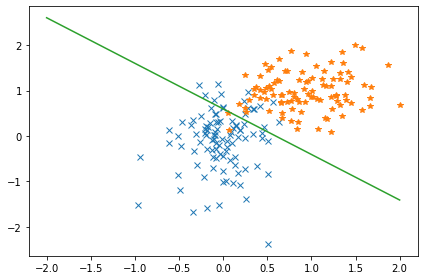

In [26]:
#Defining the categorizer line
x_line = np.linspace(-2, 2, 100)
#Reciving weights and biyas of our neuron
weights = ada_nur.getW()
b = ada_nur.getThreshold()
#put the calculated variables into the line
y_line = ((weights[0] * x_line) + b) /-weights[1]
print(-weights[1] , "y = " , weights[0] , " * x + " , b )
#------------------------------------------------------
#Plotting
print("plotting")
#figure, axis = plt.subplots(2, 1)
plt.rcParams["figure.autolayout"] = True
plt.plot(x1 , y1,  'x')
plt.plot(x2 , y2,  '*')
plt.plot(x_line ,y_line)


Text(0, 0.5, 'MSE')

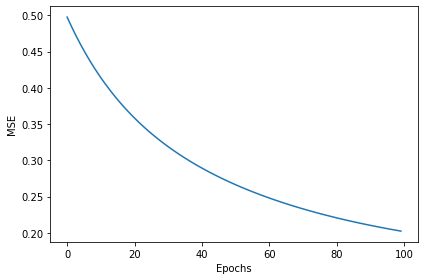

In [28]:
plt.plot(errorData01 )
plt.xlabel("Epochs")
plt.ylabel("MSE")

ct =  100
0.45696660585627547 y =  -0.45843701760699473  * x +  0.27248434226581797
plotting


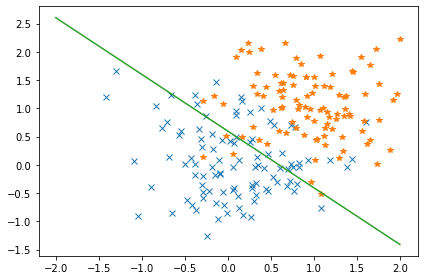

In [29]:
#creating the firt sets of data
mean1 = [0, 0]
cov1 = [[0.4 , 0], [0, 0.4]]
x1 , y1 = np.random.multivariate_normal(mean1, cov1 , 100).T
#---
#Creating the secong sets of data
mean2 = [1, 1]
cov2 = [[0.3 , 0], [0, 0.3]]
x2  , y2= np.random.multivariate_normal(mean2, cov2 , 100).T
#Defining our neuron
ada_nur2 = adaline_neuron()
flag = True
ct=0
errorData01 = []

while(ct<100):
    error01 = ada_nur2.learn(all_data[:,0] ,all_data[:,1] , all_data[:,2])
    errorData01.append(error01)
    flag1 = ada_nur2.isEnough(x1 , y1 , 1)
    if (not(flag1)) : break
    ct +=1
print("ct = " , ct)
#Defining the categorizer line
x_line = np.linspace(-2, 2, 100)
#Reciving weights and biyas of our neuron
weights = ada_nur2.getW()
b = ada_nur2.getThreshold()
#put the calculated variables into the line
y_line = ((weights[0] * x_line) + b) /-weights[1]
print(-weights[1] , "y = " , weights[0] , " * x + " , b )
#------------------------------------------------------
#Plotting
print("plotting")
#figure, axis = plt.subplots(2, 1)
plt.rcParams["figure.autolayout"] = True
plt.plot(x1 , y1,  'x')
plt.plot(x2 , y2,  '*')
plt.plot(x_line ,y_line)

Text(0, 0.5, 'MSE')

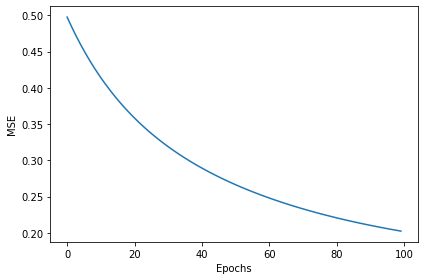

In [30]:
plt.plot(errorData01 )
plt.xlabel("Epochs")
plt.ylabel("MSE")